# Percolation

In [1]:
from RandomLoop import StateSpace
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import json
from tqdm.notebook import tqdm

In [3]:
%load_ext snakeviz

In [4]:
%snakeviz m.loop_builder_fast((32,32))

 
*** Profile stats marshalled to file 'C:\\Users\\lollo\\AppData\\Local\\Temp\\tmpuq2lqbum'.
Embedding SnakeViz in this document...
<function display at 0x000001E5F4ED1B20>


  0%|          | 0/1000000 [00:00<?, ?it/s]

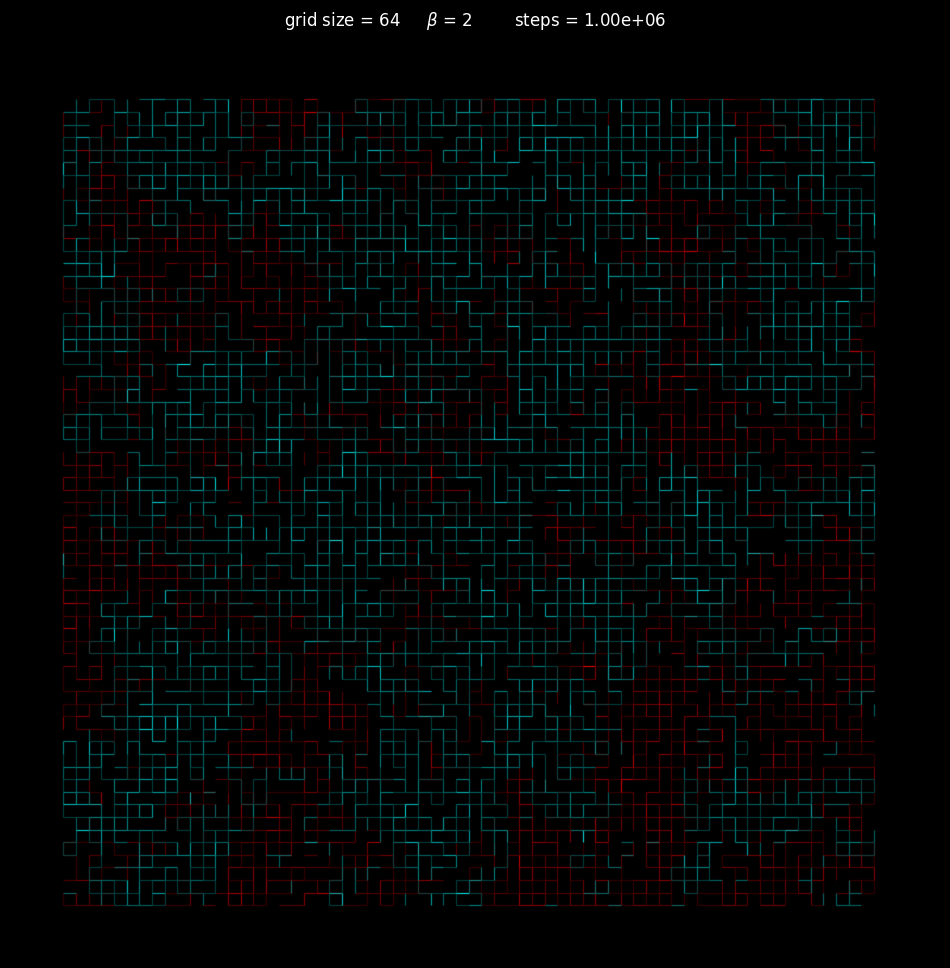

In [11]:
m = StateSpace(2, 64, 2)
m.step(1_000_000)
m.plot_overlap()

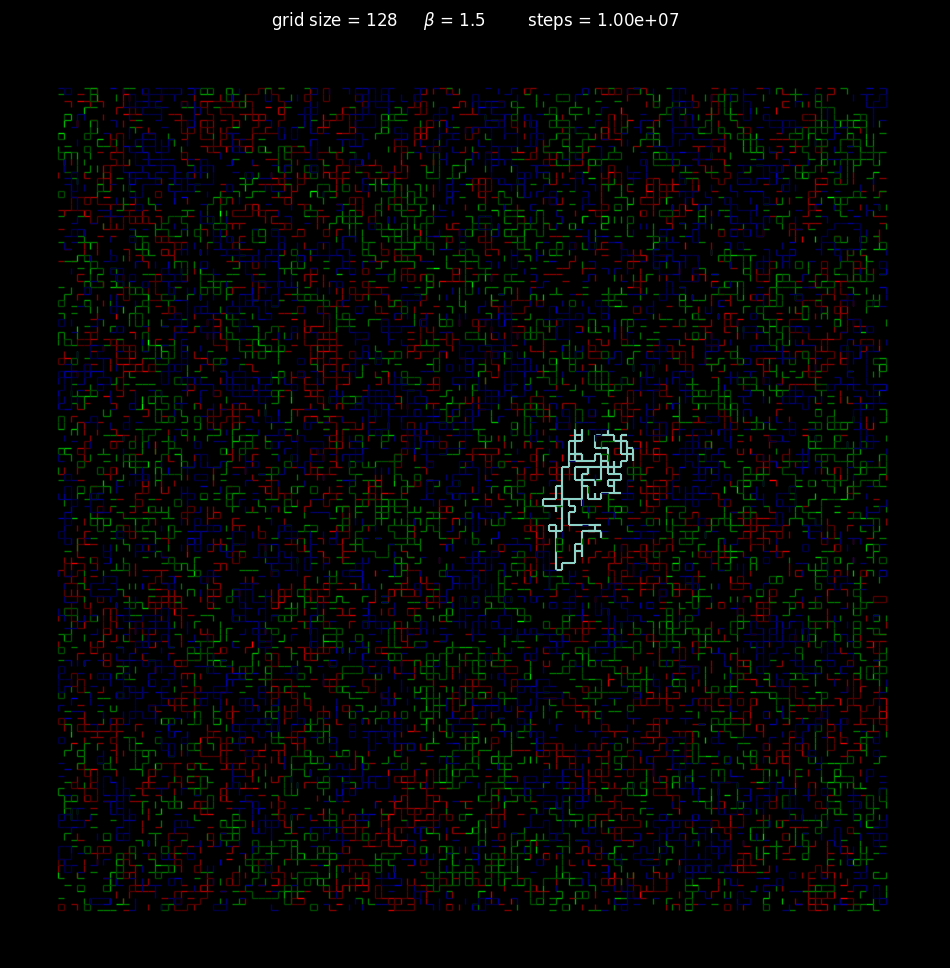

In [53]:
loops, lenghts = m.loop_builder_fast()

max_len = max(lenghts[0])
for l in loops[0]:
    if len(l) == max_len:
        m.plot_loop_overlap([[l], [], []])
        break


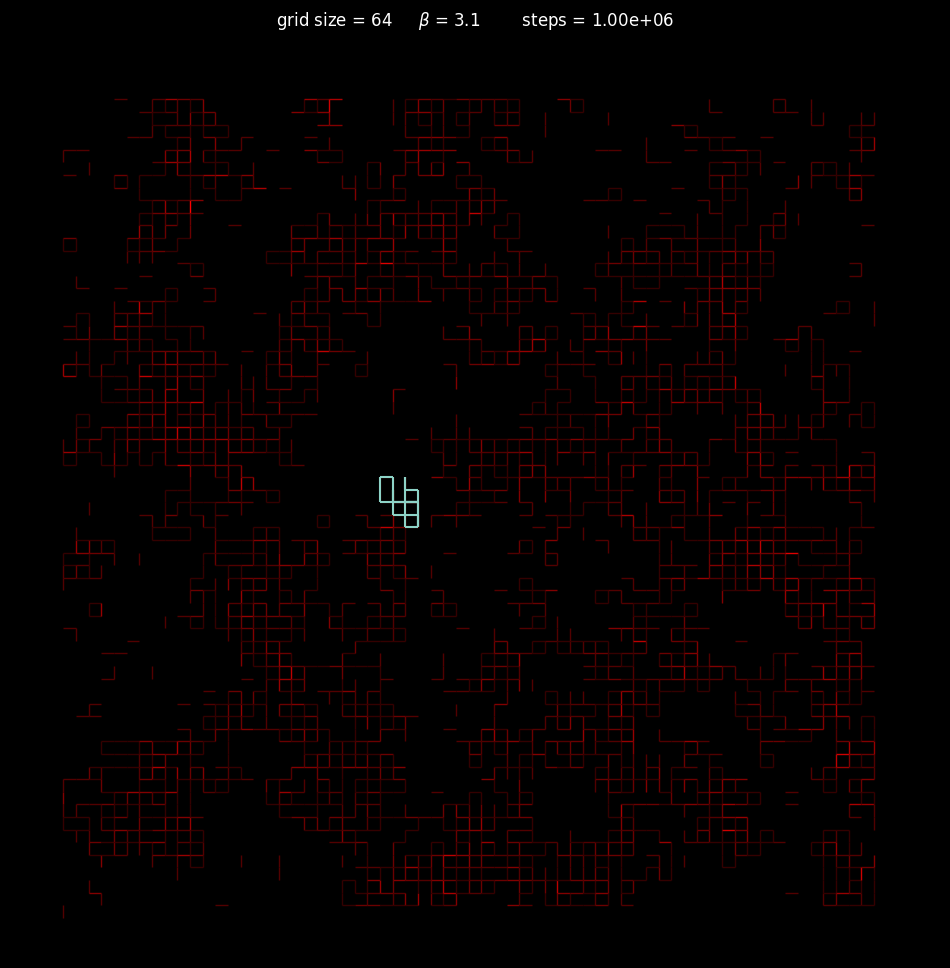

In [58]:
loops, _ = m.loop_builder_fast((27,30))

m.plot_loop_overlap(loops[0], color=0)


In [16]:
_[0][0]

13656

In [2]:
def read_perc_data(file_name):
    with open(file_name, 'r') as file:
        data_raw = json.load(file)

    data = {
        'percolation': np.array(data_raw['percolation'])
    }

    coords = {
        'betas': data_raw['params']['betas']
    }

    dims = {
        'percolation': ['beta']
    }

    idata = az.convert_to_inference_data(data, coords=coords, dims=dims)
    summary = az.summary(idata)
    
    return summary['mean'], summary['mcse_mean']


In [3]:
perc_prob_32, sigma_32 = read_perc_data('data\\percolation\\32_2024-04-15_16_47_22.json')
perc_prob_64, sigma_64 = read_perc_data('data\\percolation\\64_2024-04-09_20_38_24.json')
perc_prob_128, sigma_128 = read_perc_data('data\\percolation\\128_2024-04-10_02_55_26.json')
perc_prob_256, sigma_256 = read_perc_data('data\\percolation\\256_2024-04-12_20_47_02.json')
perc_prob_512, sigma_512 = read_perc_data('data\\percolation\\512_2024-04-16_18_40_54.json')

perc_probs = [perc_prob_32, perc_prob_64, perc_prob_128, perc_prob_256, perc_prob_512] 
sigmas = [sigma_32, sigma_64, sigma_128, sigma_256, sigma_512]

C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFou

Text(0.5, 0, '$\\beta$')

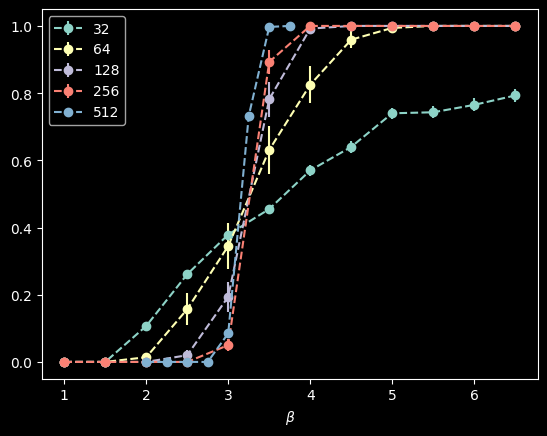

In [8]:
grid_sizes = [32, 64, 128, 256, 512]
for i in range(len(perc_probs)-1):
    plt.errorbar(np.arange(1, 7, 0.5), perc_probs[i], sigmas[i], linestyle='--', marker='o',label = grid_sizes[i])

plt.errorbar(np.arange(2, 4, 0.25), perc_prob_512, linestyle='--', marker='o',label = grid_sizes[-1])
plt.legend()
plt.xlabel(r'$\beta$')

<ErrorbarContainer object of 3 artists>

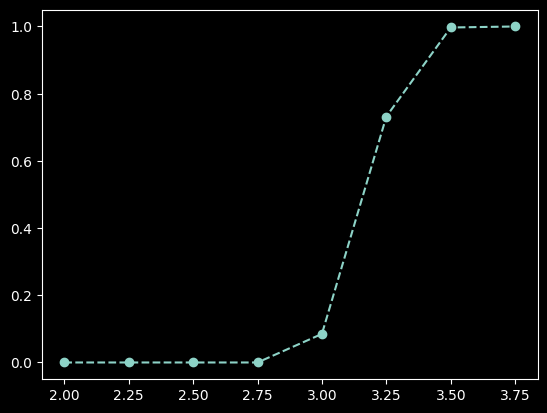

In [9]:
plt.errorbar(np.arange(2, 4, 0.25), perc_prob_512, linestyle='--', marker='o',label = grid_sizes[-1])

In [55]:
np.arange(2.75, 4, 0.5)

array([2.75, 3.25, 3.75])

In [54]:
np.arange(2.75, 4, 0.5)

array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5])

In [22]:

with open('data\\percolation\\32_2024-04-15_16_47_22.json', 'r') as file:
        data_raw = json.load(file)

data = {
    'percolation': np.array(data_raw['percolation'])
}

coords = {
    'betas': data_raw['params']['betas']
}

dims = {
    'percolation': ['beta']
}

idata = az.convert_to_inference_data(data, coords=coords, dims=dims)
idata

Inference data with groups:
	> posterior

### One color

C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\lollo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


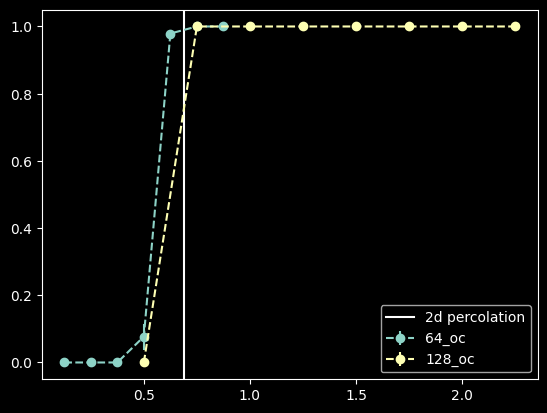

In [25]:
perc_prob_128_oc, sigma_128_oc = read_perc_data('data\\percolation\\one_color_128_2024-04-21_15_57_17.json')
perc_prob_64_oc, sigma_64_oc = read_perc_data('data\\percolation\\one_color_64_2024-04-21_16_00_44.json')
plt.errorbar(np.arange(0.125, 1, 0.125), perc_prob_64_oc, yerr=sigma_64_oc, linestyle='--', marker='o',label = '64_oc')
plt.errorbar(np.arange(0.5, 2.5, 0.25), perc_prob_128_oc, yerr=sigma_128_oc, linestyle='--', marker='o',label = '128_oc')
plt.axvline(x=0.69, label='2d percolation')
plt.legend()

In [22]:
n = 3000
-np.log(1 - 0.5**(1/n))

8.372996010537499